# Problem

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to 
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

https://www.kaggle.com/ronitf/heart-disease-uci

***

In [2]:
!pip install kaggle

     |████████████████████████████████| 58 kB 714 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 7.4 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=67690b46a402e2bb990ce439f5dc7bd534bfc32ac9d7697569e663bd40e019db
  Stored in directory: /home/jovyan/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [4]:
!pip install pandas-profiling[notebook]

     |████████████████████████████████| 248 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 676 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 7.6 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=06c4c05b3b9dd22c581c5d7405889ad8739f9aafa3b68ca11ccfdc307426d617
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=e5c306631e521121c0ce590d4e2aa4c755954f7464173e7d9f6fd6a5dad9debf
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/f9/a5/740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import kaggle

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas_profiling as pp

sns.set_theme(style="darkgrid")
%matplotlib inline

# Exploratory Data Analysis

In [6]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('ronitf/heart-disease-uci', path='data/', unzip=True)

## Data Dictionary

* age 
* sex 
* chest pain type (4 values) 
* resting blood pressure 
* serum cholestoral in mg/dl 
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved 
* exercise induced angina 
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment 
* number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [7]:
data = pd.read_csv('./data/heart.csv')

## Overview

First, we gather basic impressions and answer basic questions about the data.

* What do some sample values look like?
* How many rows are there and what are their types?

In [8]:
data.sample(frac=.1).head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


In [9]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
profile = pp.ProfileReport(data).to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'to_notebook_iframe'

## Data Quality

* Is there missing data?
* Are columns the right types?
* Are there outliers in any of the columns? Consider uni-variate and multi-variate analysis. 

#### *Is there missing data?*

In [8]:
print(str('Are there any missing values in the dataset?'), data.isnull().values.any())

Are there any missing values in the dataset? False


#### *Are columns the right types?*

We can see from data type summary above that all the columns are the correct type.

#### *Are there outliers in any of the columns?*

**Univariate Analysis** 

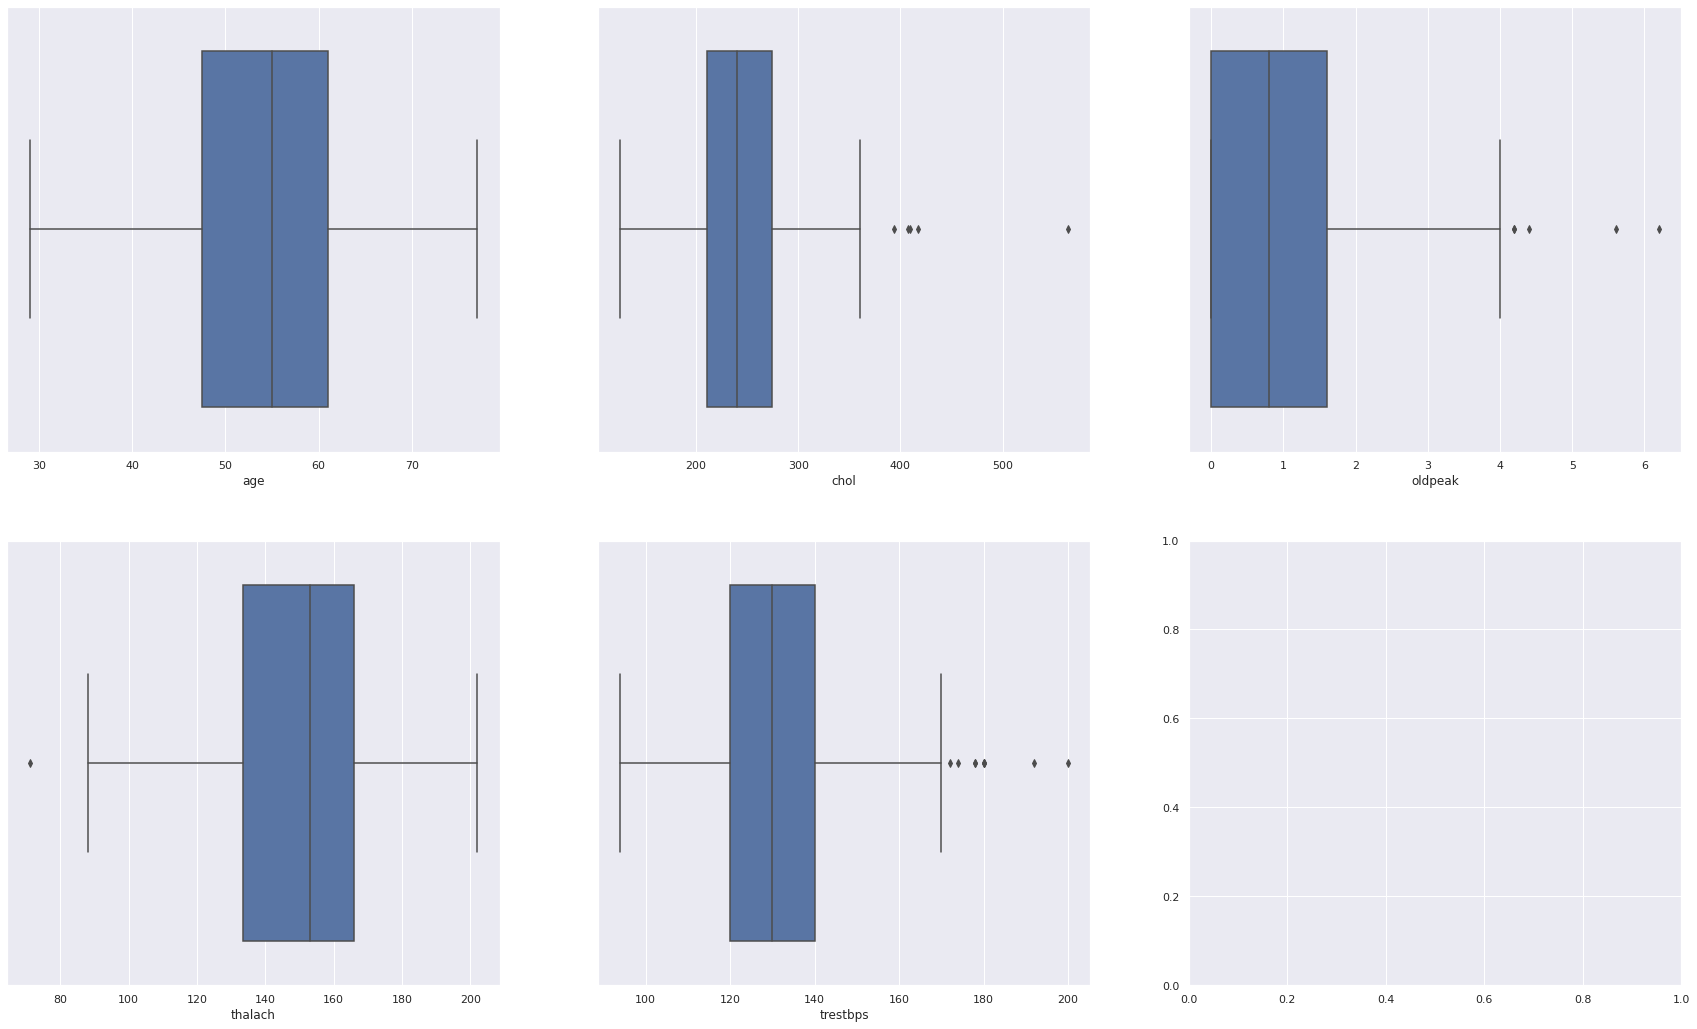

In [32]:
boxplot_fields = np.setdiff1d(data.columns.values, ["target", "fbs", "sex", "exang", "cp", "restecg", "slope", "ca", "thal"])
fig, ax = plt.subplots(2, 3, figsize=(30, 18))
for var, subplot in zip(boxplot_fields, ax.flatten()):
    sns.boxplot(x=var, data=data, ax=subplot)

**Multi-Variate Analysis**

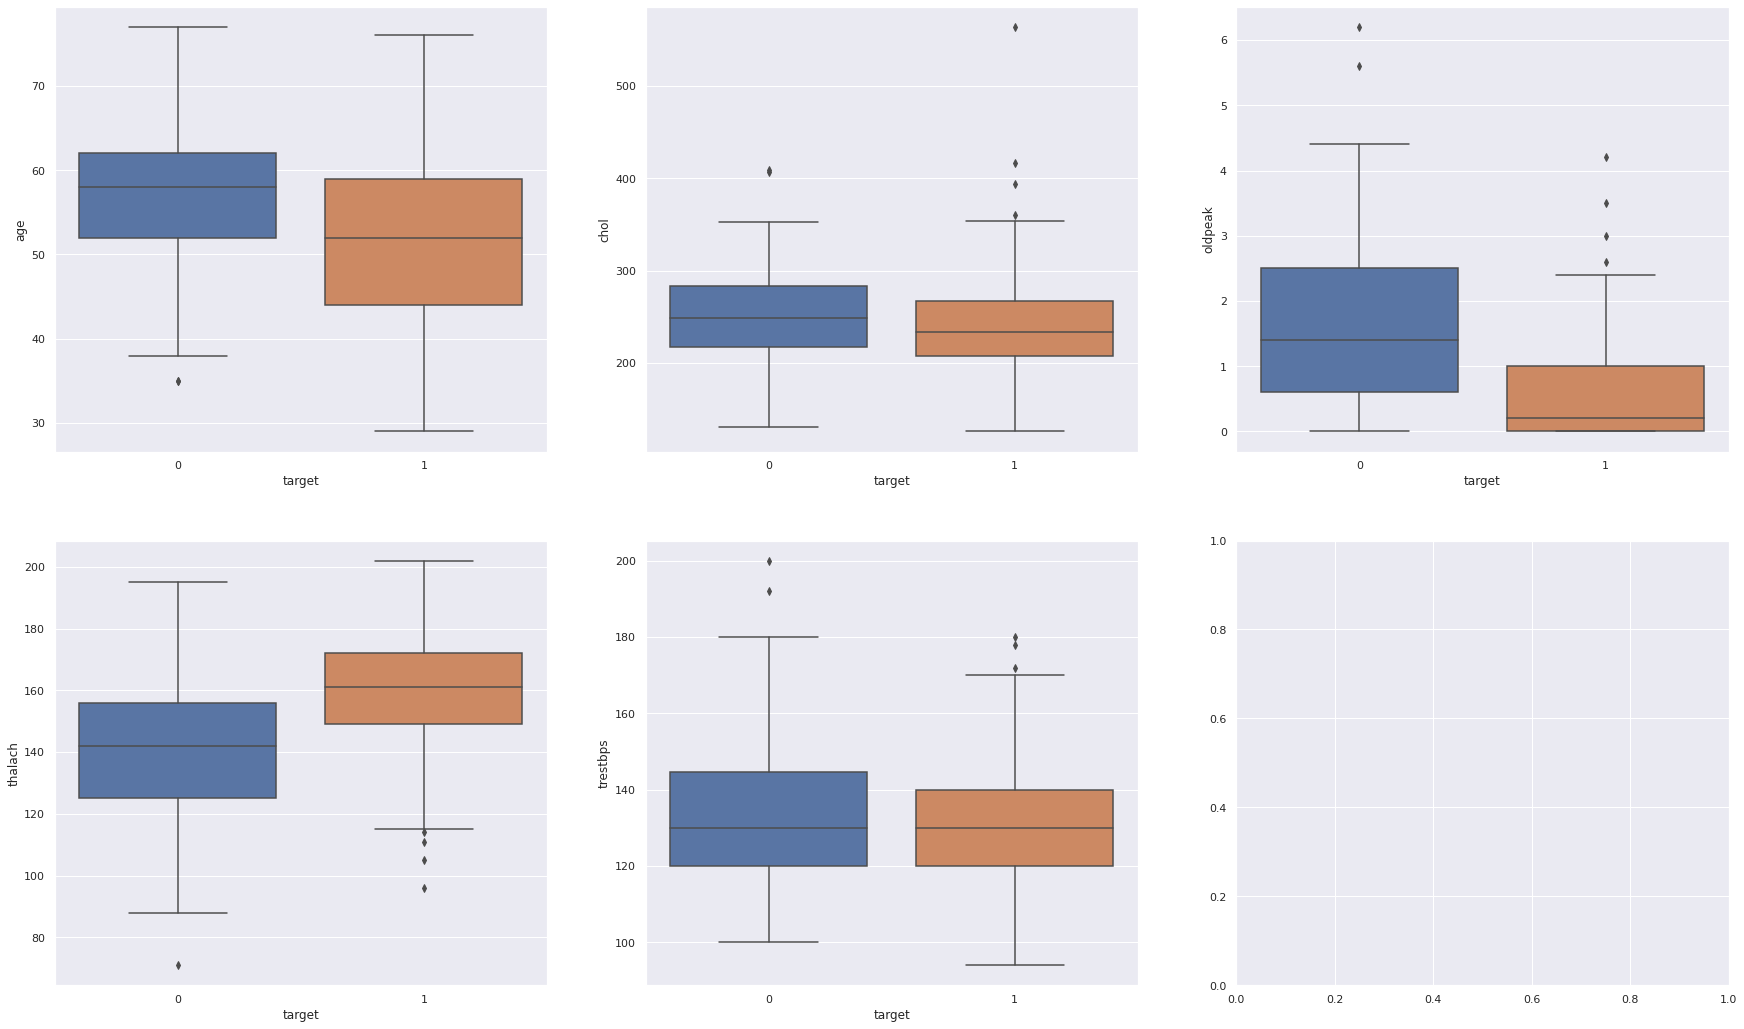

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(30, 18))
for var, subplot in zip(boxplot_fields, ax.flatten()):
    sns.boxplot(x='target', y=var, data=data, ax=subplot)

## Graphical Exploration

#### Distributional Observations

An early step in any effort to analyze or model data is understanding how the variables are distributed.

* What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?
* Is the response variable imbalanced?

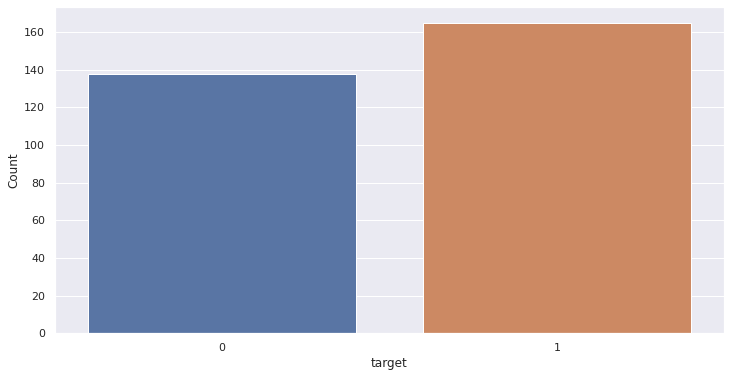

In [35]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="target", data=data);
ax.set_ylabel("Count")
plt.show()

*Observations*


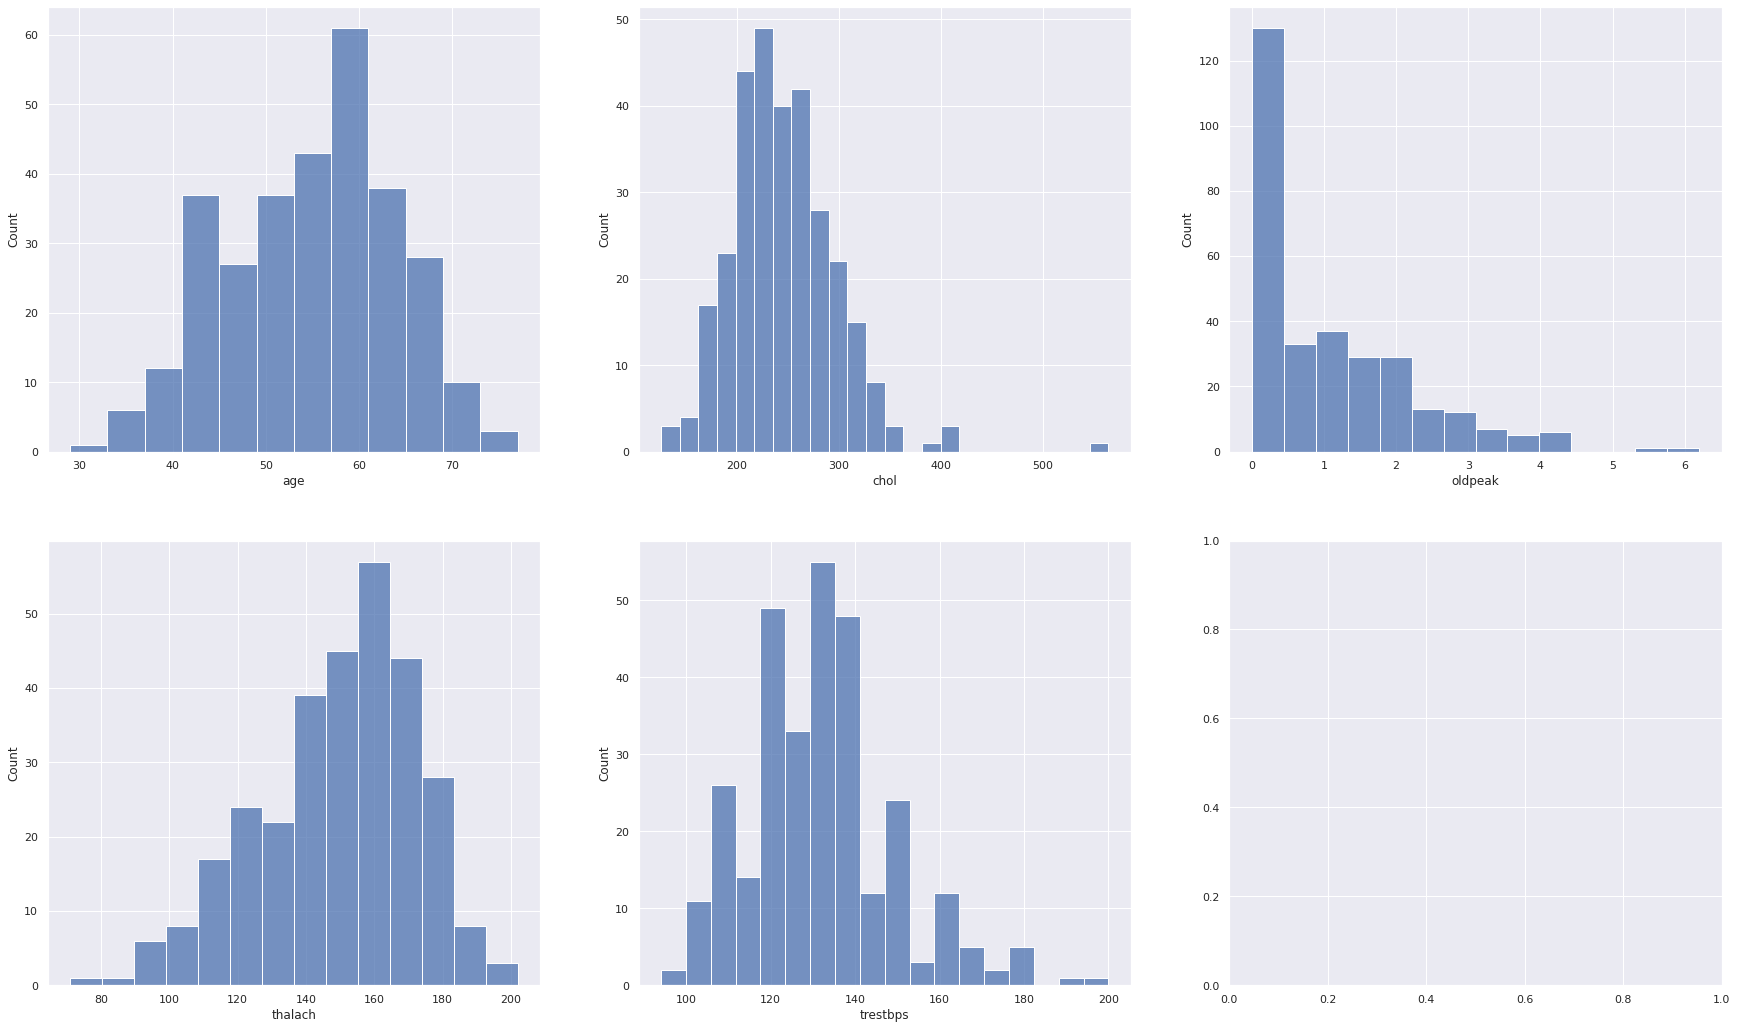

In [36]:
fig, ax = plt.subplots(2, 3, squeeze=True, figsize=(30, 18))
for col, subplot in zip(boxplot_fields, ax.flatten()):
    sns.histplot(data, x=col, ax=subplot);

#### Relationships

**Spearmen's Correlation**

The key assumptions of using this statistic are,

* It is appropriate when one or both variables are skewed or ordinal1 and is robust when extreme values are present.

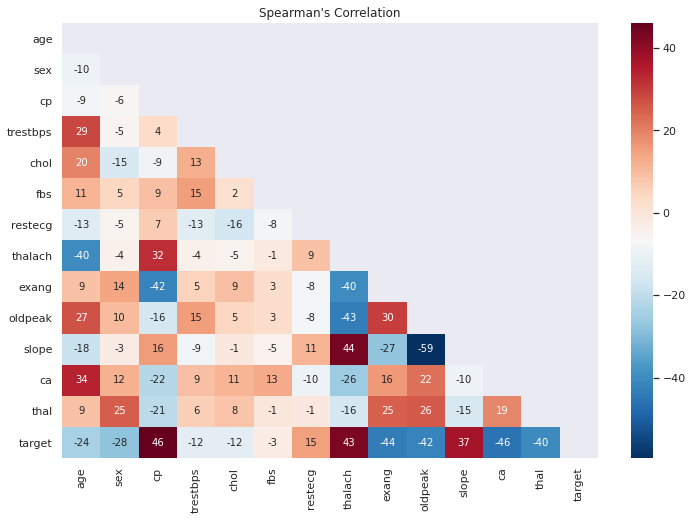

In [39]:
## lower traingluar mask as correlation matrix is symmetric 
plt.figure(figsize=(12,8))
plt.title("Spearman's Correlation")
lower_triangle_mask  = np.zeros_like(data.corr(method='spearman'))## a matrix of 0s whcih has same shape as df.corr()
lower_triangle_mask[np.triu_indices_from(lower_triangle_mask)]  = True ## setting the lower triangle indices to 1 for our mask 
sns.heatmap(data.corr(method='spearman')*100, mask = lower_triangle_mask , cmap = 'RdBu_r',fmt='.0f',annot=True)
plt.show()